<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/algebra/blob/main/classes/medicion/cinta_bobinometrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## [Video de apoyo a la lectura interactiva y experimental de este cuaderno](https://www.youtube.com/watch?v=CSsgC2daQOU)

Un reconocimiento a mis estudiantes que han construido conmigo este saber pedagógico:

<img src = ''> 

# Llamar a lista o tomar asistencia con python o llamar el equipo para la tarea con video y cuaderno Jupyter sobre medición indirecta de grandes alturas con imágenes

In [1]:
def crear_lista_estudiantes(nombre_curso):
    import pandas as pd     
    from random import choice
    grupo_df = pd.read_excel(nombre_curso) 
    # cuando el .csv file proviene de un .xlsx file, debe utilizarse sep = ';'
    lista_estudiantes = list(grupo_df.nombre.values)
    return lista_estudiantes 


In [2]:
#llamar a lista o tomar registro de asistencia a clase
def llamar_estudiantes_a_participar():
    import numpy as np 
    from random import choice
    if len(lista_estudiantes) != 0:
        estudiante = choice(lista_estudiantes)
        lista_estudiantes.remove(estudiante)
        return print(estudiante)
    else:
        print('Todos los estudiantes han participado.\n \
               Muchas gracias y Felicitaciones')

In [3]:
lista_estudiantes = crear_lista_estudiantes('1_algebra.xlsx')

In [4]:
llamar_estudiantes_a_participar()

AMARIS FERNANDEZ SEBASTIAN CAMILO


# Modelación del peso de los estudiantes del curso de Álgebra y Trigonometría

<img src = 'https://www.inalmet.com/images/productos/CINTAS_BOVINAS/galeria_bovina/5.jpg'>

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSrc3iMHJW8cBOwNgF4gnhNZBjmskVMfGPkLRJbrg4IBLJEsLCb769p5PlFHi0lpAdxjs&usqp=CAU'>

## El objetivo de esta práctica científica es:  

* Obtener una fórmula para estimar el peso de una persona dado el perímetro de su su parte media. 

# 1 Obtención de datos


* Cinta métrica de 50 metros. 
* Una pesa electrónica marca: Iscale

In [49]:
import pandas as pd 

tabla_medidas_corporales = pd.read_excel("mediciones_de_los_estudiantes.xlsx")


tabla_medidas_corporales

,perimetro_toracico_estudiantes,peso_estudiantes
0,90,74
1,79,54
2,79,56.85
3,110,108
4,78,63
5,88,"60,50"
6,100,"93,75"
7,87,"66,85"
8,89,73
9,68,50


# Ordenar la información en forma ascendente

In [51]:
tabla_medidas_corporales.keys()

Index(['perimetro_toracico_estudiantes ', 'peso_estudiantes '], dtype='object')

In [52]:
tabla_medidas_corporales = tabla_medidas_corporales.sort_values(by ="perimetro_toracico_estudiantes ")

In [53]:
tabla_medidas_corporales

,perimetro_toracico_estudiantes,peso_estudiantes
9,68,50
13,70,53
22,73,49
14,73,50
23,75,58
15,77,53
12,77,59
4,78,63
26,78,62
19,78,48


In [9]:
tabla = tabla.sort_values(by = 'perimetro(centimetros)')

In [10]:
tabla['peso_por_perimetro'] = tabla['peso(kilogramos)']/tabla['perimetro(centimetros)'] 

In [11]:
tabla 

,perimetro(centimetros),peso(kilogramos),peso_por_perimetro
3,76,58,0.763158
5,80,49,0.612500
1,82,52,0.634146
6,83,49,0.590361
4,88,65,0.738636
7,96,69,0.718750
2,100,68,0.680000
8,108,81,0.750000
9,112,82,0.732143


## Inferencias o interpretaciones que se derivan de la lectura de la tabla

* Las tablas se leen de manera vertical de arriba hacia abajo.

* la función de peso es **creciente**, es decir, a medida que el perimetró crece, el peso correspondiente esencialmente también crece. 

* pero la relación entre peso y perimetro no es de proporcionalidad directa porque el cociente entre cantidades respectivas de estas dos variables no es constante. 

# Gráfico de la relación entre longitud y peso

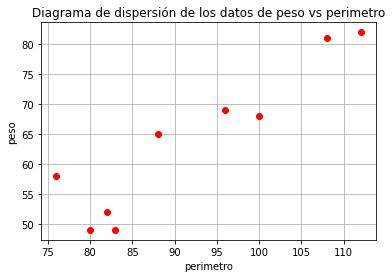

In [33]:
import matplotlib.pyplot as plt 

plt.plot(perimetros, pesos, 'ro')
plt.title('Diagrama de dispersión de los datos de peso vs perimetro')
plt.xlabel('perimetro')
plt.ylabel('peso')

plt.grid() 

plt.show() 

# Inferencaias o interpretaciones que se derivan de la lectura del gráfico 

* El gráfico se lee de izquierda a derecha.
* En  el gráfico se ve que la relación entre peso y perímetro es creciente, pues a perímetro mayor le corresponde un mayor peso. Eso se nota porque los puntos van ganando altura. 

* Si suponemos que la relación es lineal, entonces busquemos la fórmula de la línea recta que nos permita predecir el peso dado el perímetro. 


$$ peso(perimetro) = m*perimetro + b $$

In [16]:
from sklearn.linear_model import LinearRegression 

regresor = LinearRegression()

regresor.fit(np.array(perimetros).reshape(-1,1), np.array(pesos)) 

LinearRegression()

In [17]:
pendiente, intersecto = regresor.coef_[0], regresor.intercept_

In [18]:
pendiente 

0.9084084084084079

In [19]:
intersecto 

-19.60410410410406

In [23]:
def peso_persona(perimetro):
    return pendiente* perimetro + intersecto 

peso_persona(80)    

53.06856856856857

# Gráfica de los datos con el modelo que los representa

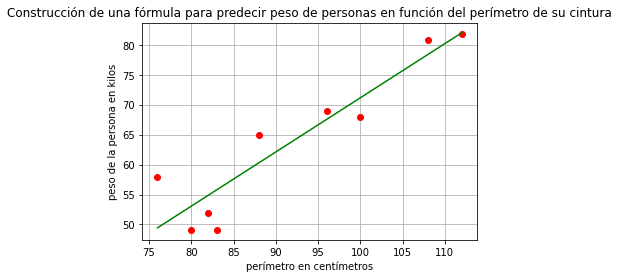

In [34]:
import matplotlib.pyplot as plt 

plt.plot(perimetros, pesos, 'ro')

plt.plot([min(perimetros), max(perimetros)], \
         [min(perimetros)*pendiente + intersecto, max(perimetros)*pendiente + intersecto], 'g-') 

plt.title('Construcción de una fórmula para predecir peso de personas en función del perímetro de su cintura') 
plt.xlabel('perímetro en centímetros')
plt.ylabel('peso de la persona en kilos') 

plt.grid() 

plt.savefig('modelo_regresion.jpg')

plt.show() 

# Interpretaciones e inferencias de la lectura del gráfico de los datos y el modelo lineal 

* El modelo lineal deducido se ajusta medianamente a los datos. 

# Medición del desempeño del modelo con MAE

In [30]:
from sklearn.metrics import mean_absolute_error 

In [32]:
mean_absolute_error(np.array(pesos), regresor.predict(np.array(perimetros).reshape(-1,1)))

3.80491602713825

## Referencias  

* la documentación oficial de la función mean_absolut_error: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

* la documentación oficial de la clase LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* como ordenar un dataframe de acuerdo a una de sus columnas: https://interactivechaos.com/es/manual/tutorial-de-pandas/ordenacion-de-dataframes-por-valor

* [madidas corporales del bovinos para estimar su peso: ](https://www.google.com/imgres?imgurl=x-raw-image:///129df6156020553c079588f65bc457c05950b5db3e6f4f1903450391d65d82b7&tbnid=PFUgYBX2nRKV0M&vet=1&imgrefurl=http://www.uco.es/zootecniaygestion/img/pictorex/02_17_19_2a._carne_2.pdf&docid=GfVFyrEXvSBRCM&w=510&h=419&itg=1&hl=es-US&source=sh/x/im)